# Populy
Como utilizar el paquete desde 0 en un notebook

El codigo de abajo ejecutaria la instalacion del paquete, para ello primero es necesario subirlo a <i>PyPi</i>, el repositorio de Python para Pip, que es su instalador. 

```

!pip install Populy

```

Todavía no se ha subido pero este paso no es necesario hacerlo ya que este notebook se está ejecutando en la carpeta del paquete

Importamos el paquete simupy, dentro de este encontramos dos archivos (módulos) llamados populationC e individualC, dentro de cada archivo hay dos objetos (clases) llamadas Population e Individual.

Solamente importamos Population, ya que este objeto sera con el que interactuemos siempre.

In [1]:
try:
    from populy.population import Population
except ModuleNotFoundError as e:
    import sys
    sys.path.append('populy')
finally:
    from populy.population import Population

En caso de que salga un error, ejecutar este código en una celda:
```python

try:
    from populy.population import Population
except ModuleNotFoundError as e:
    import sys
    sys.path.append('populy')
finally:
    from populy.population import Population
```

Se instancia un objeto de la clase Population.

Esto significa que tenemos una nueva poblacion vacía a la cual le hemos llamado 'human'. Esta poblacion tiene una serie de características, llamadas <b>atributos</b>, que la definen. En este caso sus valores son unos predeterminados pero se pueden cambiar pasandole el nuevo valor del atributo dentro del paréntesis tal y como se ha hecho con el tamaño (size)

In [ ]:
# se crea una nueva poblacion donde se especifican caracteristicas generales de esta
human = Population(size=1000,fit=3)

Ahora se generan los individuos, estos individuos tendran unas caracteristicas dadas por los atributos que le pasemos (o los valores predeterminados en su defecto).

A generateIndividuals se le llama función de clase o método y lo que hace es ejecutar un bloque de código para nuestra poblacion human. A partir de ahora, la mayoría de código seguirá la estructura de:

"nombre de la poblacion."metodo"() 

Lo que hace por dentro es crear una lista de instancias de la clase individuo, que suena muy complicado pero se trata del mismo proceso que arriba pero en lugar de crear una poblacion <i>Population</i> se crearan 50 individuos <i>Individual</i>.

In [ ]:
# se generan individuos en esa poblacion
human.generateIndividuals()

Este método nos muestra una cantidad de individuos (5) de nuestra población

In [ ]:
# parametro opcional show, permite elegir cuantos elementos se muestran (por defecto se muestran 10)
human.printIndiv(show=5)

## Evolución
Aquí se lleva a cabo la evolución de la población. La forma de evolucionar es sencilla:
1. Se escogen 2 individuos de forma aleatoria de nuestra población
2. Se comprueban una serie de parámetros (si ambos son de sexos diferentes, por ejemplo)
3. Si se cumplen estos parámetros se genera un nuevo individuo (recordemos que individuo es una forma de referirse a un objeto de la clase individuo)
4. Dentro de cada individuo se genenera su genoma (sus cromosomas homólogos ya que se trabaja con un único cromosoma)
5. Se realizan algunas operaciones más, como la posibilidad de una mutación o la recombinación
6. Se aplica (o no) una función de selección que vendrá dada por su genoma, si sobrevive se añadirá a la siguiente generación (pasará el filtro)
8. Repetir el proceso hasta que tengamos una nueva población del mismo tamaño
9. Repetir el proceso hasta llegar al número de generaciones especificada

In [ ]:

# muestra la cantidad de individuos con 'AA','aa'...
human.evolvePop(gens=200,every=10,printInfo=False)

In [ ]:
# se vuelve a printar los individuos, esta vez de la ultima poblacion (generación 55)
human.printIndiv(show=10)

## Extraer información
Una vez completada la evolucion podemos acceder a los atributos y/o metodos de nuestra poblacion para ver si ha cambiado, o que informacion se ha ido recopilando durante la evolucion.


In [ ]:
# para ver la frecuencia alelica de la ultima poblacion [metodo]
print(f"Frecuencias alelicas para el alelo mayor:\n{human.alleleFreq()}")
# para ver la frecuencia gametica de la poblacion [metodo]
print(f"Frecuencias gameticas:\n{human.gameticFreq()}")
# para ver cuandos individuos han sufrido mutaciones [metodo]
print(f"Número de individuos que han sufrido alguna mutación: {human.findMutated()}")

Con estas 3 características ya podemos analizar algunos efectos de la evolución y de nuestra población. 
Vemos que las frecuencias alélicas han aumentado respecto a las frecuencias alélicas iniciales que eran: 
```python 
{'A':(0.5,0.5),'B':(0.5,0.5)}
```
Esto es debido principalmente a que le hemos aplicado una función de fitness en la que los dobles recesivos (o dobles menores) son eliminados de la población. Tal y como se puede observar en la frecuencia de los gametos 'ab', que es muy baja.

In [ ]:
# printa el individuo que se quiere estudiar y sus padres
human.printParentIndividuals(id=2)

## Representar gráficamente la evolución

La forma más sencilla de ver la evolución de una población es estudiar su genoma, para nuestro ejemplo se ha especificado una población diploide con 2 locus (o genes) A y B. Podemos ver cómo ha ido cambiando la frecuencia del alelo mayor, así como de las frecuencias gaméticas.
A partir de aquí se puede visualizar el efecto de la fijación de un alelo u otro, el efecto de la selección, de la mutación o de la frecuencia de recombinación, que al fin y al cabo es un indicador de la proximidad de los dos locus.

In [ ]:
# obtiene un resumen del cambio en la frecuencia alelica y gametica
human.plotAll(printInfo=False)

## Simulación de múltiples poblaciones

Es posible crear varias instancias de la clase población y estudiarlas independientemente de esta forma:
```python
# sin usar bucles
pop1 = Population(size=20)
pop2 = Population(size=20)
...
# usando bucles
for x in range(2):
    pop+str(x) = Population(size=20)
```
Sin embargo, en ocasiones nos interesa obtener información de un conjunto de poblaciones. Así pues, al igual que existe el módulo Population también existe uno llamado Superpop que permite trabajar con un conjunto de poblaciones.

In [2]:
from populy.superpop import Superpop

# permite eliminar el output por terminal
from IPython.display import clear_output

In [3]:
# creamos el objeto
sPop = Superpop(popsize=10,n=10)
# Iniciamos todas las poblaciones 
sPop.startPops(gens=100)
clear_output()

['gen.0', 'gen.5', 'gen.10', 'gen.15', 'gen.20', 'gen.25', 'gen.30', 'gen.35', 'gen.40', 'gen.45', 'gen.50', 'gen.55', 'gen.60', 'gen.65', 'gen.70', 'gen.75', 'gen.80', 'gen.85', 'gen.90', 'gen.95', 'gen.100']


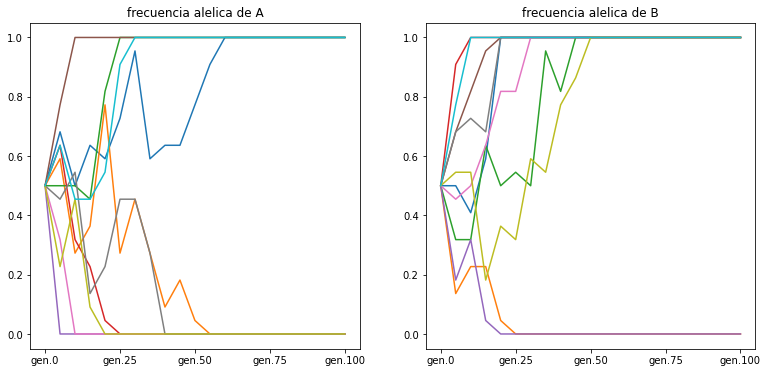

In [4]:
sPop.plotPops()

## Interpretación de resultados

Lo primero que podemos observar es que tanto el locus A como el B se han fijado en la población, esto se debe (principalmente) al efecto de la deriva genética, un fenómeno que aparece en poblaciones de pequeño tamaño como son las nuestras.
Lo segundo es que parece que se fijan con más frecuencia los alelos mayores, esto se puede ver mejor mediante el siguiente código :

Quizá es demasiado complejo?

In [6]:
# Lista de poblaciones
pops = sPop.sPop
# para ver el tamaño de la lista, es decir, el numero de subpoblaciones...
size = len(pops)
print(size)

# para ver las frecuencias alelicas de la ultima generacion recorremos la lista
fA = 0
fB = 0
for i,poblacion in enumerate(pops):
    frecuencias_alelicas = poblacion.alleleFreq()
    print(f'Frecuencias alelicas de la poblacion {i} en la ultima generacion {poblacion.gen}',
          frecuencias_alelicas,sep='\n')
    # contamos cuantos alelos se han fijado
    if frecuencias_alelicas['A'] == 1:
        fA +=1
    if frecuencias_alelicas['B'] == 1:
        fB +=1
# calculamos el porcentaje sobre el total
fA = fA/size
fB = fB/size

print(fA,fB)

10
Frecuencias alelicas de la poblacion 0 en la ultima generacion 100
{'A': 1.0, 'B': 1.0}
Frecuencias alelicas de la poblacion 1 en la ultima generacion 100
{'A': 0.0, 'B': 0.0}
Frecuencias alelicas de la poblacion 2 en la ultima generacion 100
{'A': 1.0, 'B': 1.0}
Frecuencias alelicas de la poblacion 3 en la ultima generacion 100
{'A': 0.0, 'B': 1.0}
Frecuencias alelicas de la poblacion 4 en la ultima generacion 100
{'A': 0.0, 'B': 0.0}
Frecuencias alelicas de la poblacion 5 en la ultima generacion 100
{'A': 1.0, 'B': 1.0}
Frecuencias alelicas de la poblacion 6 en la ultima generacion 100
{'A': 0.0, 'B': 1.0}
Frecuencias alelicas de la poblacion 7 en la ultima generacion 100
{'A': 0.0, 'B': 1.0}
Frecuencias alelicas de la poblacion 8 en la ultima generacion 100
{'A': 0.0, 'B': 1.0}
Frecuencias alelicas de la poblacion 9 en la ultima generacion 100
{'A': 1.0, 'B': 1.0}
0.4 0.8


- El alelo A se ha fijado un 40% de las veces, es decir, el alelo menor se ha fijado con más frecuencia (un 60%)
- El alelo B se ha fijado un 80% de las veces, es decir, el alelo menor se ha fijado con menos frecuencia (un 20%)

Cabría preguntarse cuál es el motivo...
